# Results from test run 
### 24.05.23

In [65]:
import pandas as pd
import pickle


Motifs

In [50]:
r1_motifs = pd.read_csv("../results_test_run/run_1/motifs.csv", header=[0,1,2])
r2_motifs = pd.read_csv("../results_test_run/run_2/motifs.csv", header=[0,1,2])

Regulons

In [66]:
with open("../results_test_run/run_1/regulons.pkl", 'rb') as f:
    r1_regulons = pickle.load(f)

with open("../results_test_run/run_2/regulons.pkl", 'rb') as f:
    r2_regulons = pickle.load(f) 

In [167]:
len(r1_regulons[0].genes)

28

In [183]:
df_r1 = pd.DataFrame({
             'TF': [reg.transcription_factor for reg in r1_regulons],
             'genes': [list(reg.genes) for reg in r1_regulons],
             'score' : [reg.score for reg in r1_regulons],
             })
df_r1['size'] = df_r1['genes'].apply(lambda x: len(x))
df_r1 = df_r1.set_index('TF')

df_r1.to_csv("../results_test_run/run_1/regulons.csv")

In [184]:
df_r2 = pd.DataFrame({
             'TF': [reg.transcription_factor for reg in r2_regulons],
             'genes': [list(reg.genes) for reg in r2_regulons],
             'score' : [reg.score for reg in r2_regulons],
             })
df_r2['size'] = df_r2['genes'].apply(lambda x: len(x))
df_r2 = df_r2.set_index('TF')

df_r2.to_csv("../results_test_run/run_1/regulons.csv")

See correlation between score and size # TODO

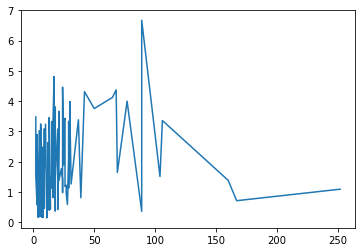

In [197]:
# based on the first run 
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import numpy as np

col1 = df_r1['size']
col2 = df_r1['score']

ind = np.argsort(col1)
plt.clf()
plt.plot(col1[ind], col2[ind])
plt.show()

TO DO:

1. upload regulons for both runs
2. compare names
3. Check out more info that exists in the regulons (ranking?)

- check in papers: how all motifs are accumulated to one regulon? + which rankings

In [91]:
mut_r1 = {}
mut_r2 = {}
for reg1 in r1_regulons:
    for reg2 in r2_regulons:
        if reg1.name == reg2.name:
            mut_r1[reg1.name] = reg1
            mut_r2[reg2.name] = reg2



91

In [86]:
mutual = []

for r1 in r1_regulons:
    for r2 in r2_regulons:
        if r1.name == r2.name: 
            mutual.append(r1.name)

print(len(mutual))  # 91 common TFs

print(len(r1_regulons))# 137
print(len(r2_regulons)) # 131

print(mutual)

91
137
131
['B-H2(+)', 'CG11586(+)', 'CG5846(+)', 'CG9727(+)', 'CHES-1-like(+)', 'CTCF(+)', 'Dp(+)', 'Dref(+)', 'E(spl)m3-HLH(+)', 'E(spl)m5-HLH(+)', 'E(spl)m7-HLH(+)', 'E(spl)m8-HLH(+)', 'E(spl)mbeta-HLH(+)', 'E2f1(+)', 'E2f2(+)', 'EcR(+)', 'FoxK(+)', 'GATAd(+)', 'HGTX(+)', 'HLH54F(+)', 'Hr78(+)', 'Mef2(+)', 'Mitf(+)', 'Myc(+)', 'NfI(+)', 'Ptx1(+)', 'Rbp6(+)', 'Rel(+)', 'Rfx(+)', 'Rx(+)', 'S2P(+)', 'SMC3(+)', 'Sox102F(+)', 'SoxN(+)', 'Spps(+)', 'Stat92E(+)', 'Su(H)(+)', 'Tet(+)', 'Trf2(+)', 'Trl(+)', 'Ubx(+)', 'Xbp1(+)', 'abd-A(+)', 'aop(+)', 'ase(+)', 'ato(+)', 'bbx(+)', 'bin(+)', 'bon(+)', 'bowl(+)', 'bru3(+)', 'cad(+)', 'cbt(+)', 'ci(+)', 'crol(+)', 'crp(+)', 'disco(+)', 'drm(+)', 'emc(+)', 'esg(+)', 'fd96Cb(+)', 'foxo(+)', 'gcm(+)', 'gcm2(+)', 'gem(+)', 'grh(+)', 'grn(+)', 'gsb(+)', 'gsb-n(+)', 'jigr1(+)', 'l(1)sc(+)', 'l(3)neo38(+)', 'mid(+)', 'mor(+)', 'nej(+)', 'nub(+)', 'odd(+)', 'pan(+)', 'phol(+)', 'pnr(+)', 'sc(+)', 'slou(+)', 'sna(+)', 'sug(+)', 'svp(+)', 'tin(+)', 'tll(+)

go over all common regulons and compare genes 

Regulon class has comparing methods - might be useful

In [97]:
from ctxcore.genesig import Regulon
## Use Regulon's intersection function

for name, reg in mut_r1.items():
    print(reg.intersection(mut_r2[name]))
    print(reg.difference(mut_r2[name]))  # only on r1
    print(mut_r2[name].difference(reg))  # only on r2
    break



[capu,CG7724,esn,CG18507,B-H2,CG9628,FucTA,peb]
[sff,Phlpp,CG31988,CG1835,E(spl)m7-HLH]
[E(spl)m2-BFM,CG4301]


## Get all TFs that appear in >80% of runs

upload runs regulons

In [1]:
from glob import glob
from os.path import basename, normpath

for folder in glob("../results_test_run/*/", recursive= True):  # get a list of all sub directories
    with open(folder+'regulons.pkl', 'rb') as f:
        regulon = pickle.load(f)
    run = basename(normpath(folder))
        
        





NameError: name 'pickle' is not defined